In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import time

In [2]:
TEAM_ID = "8ef52968"
SEASON = "2025-2026"

urls = {
    'overview': f"https://fbref.com/en/squads/{TEAM_ID}/{SEASON}/Sunderland-Stats",
    'match_logs': f"https://fbref.com/en/squads/{TEAM_ID}/{SEASON}/matchlogs/all_comps/schedule/Sunderland-Scores-and-Fixtures-All-Competitions"
}

print("Targets links:")
for name, url in urls.items():
    print(f"  {name}: {url}")

Targets links:
  overview: https://fbref.com/en/squads/8ef52968/2025-2026/Sunderland-Stats
  match_logs: https://fbref.com/en/squads/8ef52968/2025-2026/matchlogs/all_comps/schedule/Sunderland-Scores-and-Fixtures-All-Competitions


In [3]:
# Defensive match logs URL
urls['defense_logs'] = f"https://fbref.com/en/squads/{TEAM_ID}/{SEASON}/matchlogs/all_comps/defense/Sunderland-Match-Logs-All-Competitions"

print("Added defense logs URL:")
print(urls['defense_logs'])

Added defense logs URL:
https://fbref.com/en/squads/8ef52968/2025-2026/matchlogs/all_comps/defense/Sunderland-Match-Logs-All-Competitions


In [4]:
print(urls)

{'overview': 'https://fbref.com/en/squads/8ef52968/2025-2026/Sunderland-Stats', 'match_logs': 'https://fbref.com/en/squads/8ef52968/2025-2026/matchlogs/all_comps/schedule/Sunderland-Scores-and-Fixtures-All-Competitions', 'defense_logs': 'https://fbref.com/en/squads/8ef52968/2025-2026/matchlogs/all_comps/defense/Sunderland-Match-Logs-All-Competitions'}


In [5]:
# Loading manually downloaded data
df = pd.read_csv('../data/sunderland_defense_logs.csv')

In [6]:
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
df.head()

Shape: (21, 27)
Columns: ['For Sunderland', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Tackles', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Challenges', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Blocks', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26']


,For Sunderland,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Blocks,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Tkl%,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err,Match Report
1,2025-08-16,15:00,Premier League,Matchweek 1,Sat,Home,W,3,0,West Ham,...,53.3,7,12,6,6,9,23,34,1,Match Report
2,2025-08-23,15:00,Premier League,Matchweek 2,Sat,Away,L,0,2,Burnley,...,72.7,3,10,1,9,7,25,28,0,Match Report
3,2025-08-26,19:45,EFL Cup,Second round,Tue,Home,D,1 (5),1 (6),Huddersfield,...,NaN,NaN,NaN,NaN,NaN,10,0,NaN,NaN,Match Report
4,2025-08-30,15:00,Premier League,Matchweek 3,Sat,Home,W,2,1,Brentford,...,63.6,8,4,1,3,7,35,35,0,Match Report


In [7]:
print(df.iloc[0])

For Sunderland            Date
Unnamed: 1                Time
Unnamed: 2                Comp
Unnamed: 3               Round
Unnamed: 4                 Day
Unnamed: 5               Venue
Unnamed: 6              Result
Unnamed: 7                  GF
Unnamed: 8                  GA
Unnamed: 9            Opponent
Tackles                    Tkl
Unnamed: 11               TklW
Unnamed: 12            Def 3rd
Unnamed: 13            Mid 3rd
Unnamed: 14            Att 3rd
Challenges                 Tkl
Unnamed: 16                Att
Unnamed: 17               Tkl%
Unnamed: 18               Lost
Blocks                  Blocks
Unnamed: 20                 Sh
Unnamed: 21               Pass
Unnamed: 22                Int
Unnamed: 23            Tkl+Int
Unnamed: 24                Clr
Unnamed: 25                Err
Unnamed: 26       Match Report
Name: 0, dtype: object


In [8]:
df.columns = df.iloc[0]  # Set row 0 as column names
df = df.drop(0)          # Remove that row from data
df = df.reset_index(drop=True)  # Reset index

print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
df.head()

Shape: (20, 27)
Columns: ['Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA', 'Opponent', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl', 'Att', 'Tkl%', 'Lost', 'Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err', 'Match Report']


,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Tkl%,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err,Match Report
0,2025-08-16,15:00,Premier League,Matchweek 1,Sat,Home,W,3,0,West Ham,...,53.3,7,12,6,6,9,23,34,1,Match Report
1,2025-08-23,15:00,Premier League,Matchweek 2,Sat,Away,L,0,2,Burnley,...,72.7,3,10,1,9,7,25,28,0,Match Report
2,2025-08-26,19:45,EFL Cup,Second round,Tue,Home,D,1 (5),1 (6),Huddersfield,...,NaN,NaN,NaN,NaN,NaN,10,0,NaN,NaN,Match Report
3,2025-08-30,15:00,Premier League,Matchweek 3,Sat,Home,W,2,1,Brentford,...,63.6,8,4,1,3,7,35,35,0,Match Report
4,2025-09-13,15:00,Premier League,Matchweek 4,Sat,Away,D,0,0,Crystal Palace,...,80,2,8,4,4,10,23,35,0,Match Report


In [9]:
print(df['Venue'].value_counts())

Venue
Home    11
Away     9
Name: count, dtype: int64


In [10]:
# Getting column list and rename duplicates
cols = df.columns.tolist()

# renaming the second 'Tkl'
tkl_count = 0
new_cols = []
for col in cols:
    if col == 'Tkl':
        tkl_count += 1
        if tkl_count == 1:
            new_cols.append('Tkl')
        else:
            new_cols.append('Tkl_vs_Dribbles')
    else:
        new_cols.append(col)

df.columns = new_cols

print("Fixed columns:")
print(df.columns.tolist())

Fixed columns:
['Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA', 'Opponent', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl_vs_Dribbles', 'Att', 'Tkl%', 'Lost', 'Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err', 'Match Report']


In [11]:
home_df = df[(df['Venue'] == 'Home') & (df['Comp']== 'Premier League')].copy()

print(f"Home games: {len(home_df)}")
home_df[['Date', 'Opponent', 'Result', 'Tkl', 'Int', 'Blocks', 'Clr']]

Home games: 10


,Date,Opponent,Result,Tkl,Int,Blocks,Clr
0,2025-08-16,West Ham,W,14,9,12,34
3,2025-08-30,Brentford,W,28,7,4,35
5,2025-09-21,Aston Villa,D,20,8,14,35
8,2025-10-18,Wolves,W,14,7,10,38
10,2025-11-03,Everton,D,14,5,10,21
11,2025-11-08,Arsenal,D,16,6,9,42
13,2025-11-29,Bournemouth,W,14,8,9,28
16,2025-12-14,Newcastle Utd,W,10,11,4,30
18,2025-12-28,Leeds United,D,14,5,18,46
19,2026-01-01,Manchester City,D,18,17,16,32


In [12]:
for col in ['Tkl', 'Int', 'Blocks', 'Clr']:
    home_df[col] = pd.to_numeric(home_df[col])

# Summary stats
print("HOME DEFENSIVE STATS SUMMARY")
print("="*40)
print(home_df[['Tkl', 'Int', 'Blocks', 'Clr']].describe())

HOME DEFENSIVE STATS SUMMARY
             Tkl        Int     Blocks        Clr
count  10.000000  10.000000  10.000000  10.000000
mean   16.200000   8.300000  10.600000  34.100000
std     4.939636   3.560587   4.599517   7.078135
min    10.000000   5.000000   4.000000  21.000000
25%    14.000000   6.250000   9.000000  30.500000
50%    14.000000   7.500000  10.000000  34.500000
75%    17.500000   8.750000  13.500000  37.250000
max    28.000000  17.000000  18.000000  46.000000


In [13]:
# Man City game vs average
city_stats = home_df[home_df['Opponent'] == 'Manchester City'][['Tkl', 'Int', 'Blocks', 'Clr']].iloc[0]
avg_stats = home_df[['Tkl', 'Int', 'Blocks', 'Clr']].mean()

comparison = pd.DataFrame({
    'Average': avg_stats,
    'vs City': city_stats,
    'Difference': city_stats - avg_stats,
    '% Above Avg': ((city_stats - avg_stats) / avg_stats * 100).round(1)
})

print("SUNDERLAND DEFENSIVE OUTPUT: MAN CITY vs AVERAGE")
print("="*55)
print(comparison)

SUNDERLAND DEFENSIVE OUTPUT: MAN CITY vs AVERAGE
        Average  vs City  Difference  % Above Avg
Tkl        16.2       18         1.8         11.1
Int         8.3       17         8.7        104.8
Blocks     10.6       16         5.4         50.9
Clr        34.1       32        -2.1         -6.2


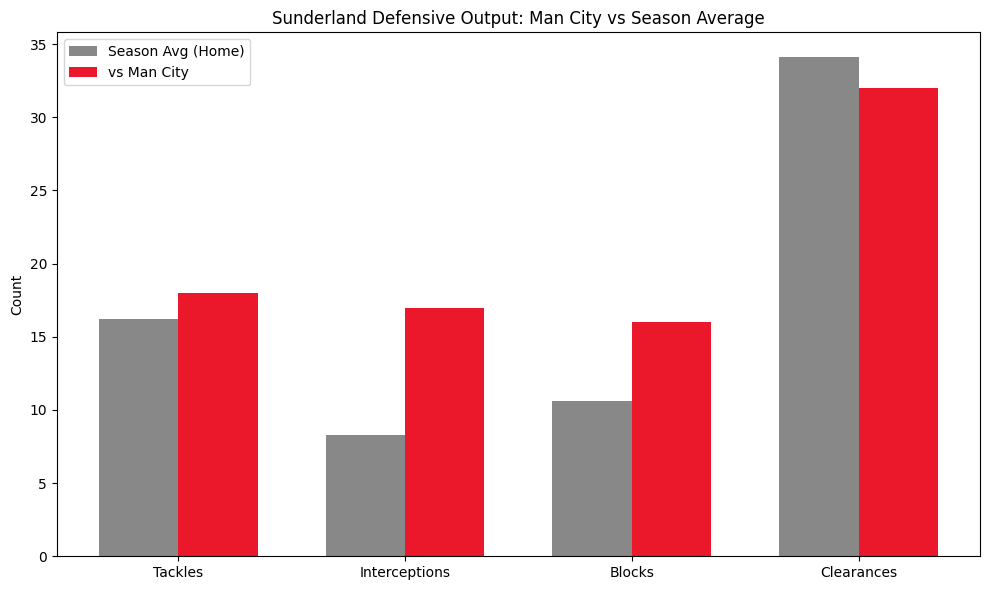

✓ Saved to visuals/


In [14]:
# Visual: Man City vs Average
import matplotlib.pyplot as plt

stats = ['Tackles', 'Interceptions', 'Blocks', 'Clearances']
avg_vals = [16.2, 8.3, 10.6, 34.1]
city_vals = [18, 17, 16, 32]

x = range(len(stats))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar([i - width/2 for i in x], avg_vals, width, label='Season Avg (Home)', color='#888888')
bars2 = ax.bar([i + width/2 for i in x], city_vals, width, label='vs Man City', color='#EB172B')

ax.set_ylabel('Count')
ax.set_title('Sunderland Defensive Output: Man City vs Season Average')
ax.set_xticks(x)
ax.set_xticklabels(stats)
ax.legend()

plt.tight_layout()
plt.savefig('../visuals/sunderland_city_defensive.png', dpi=300)
plt.show()

print("✓ Saved to visuals/")

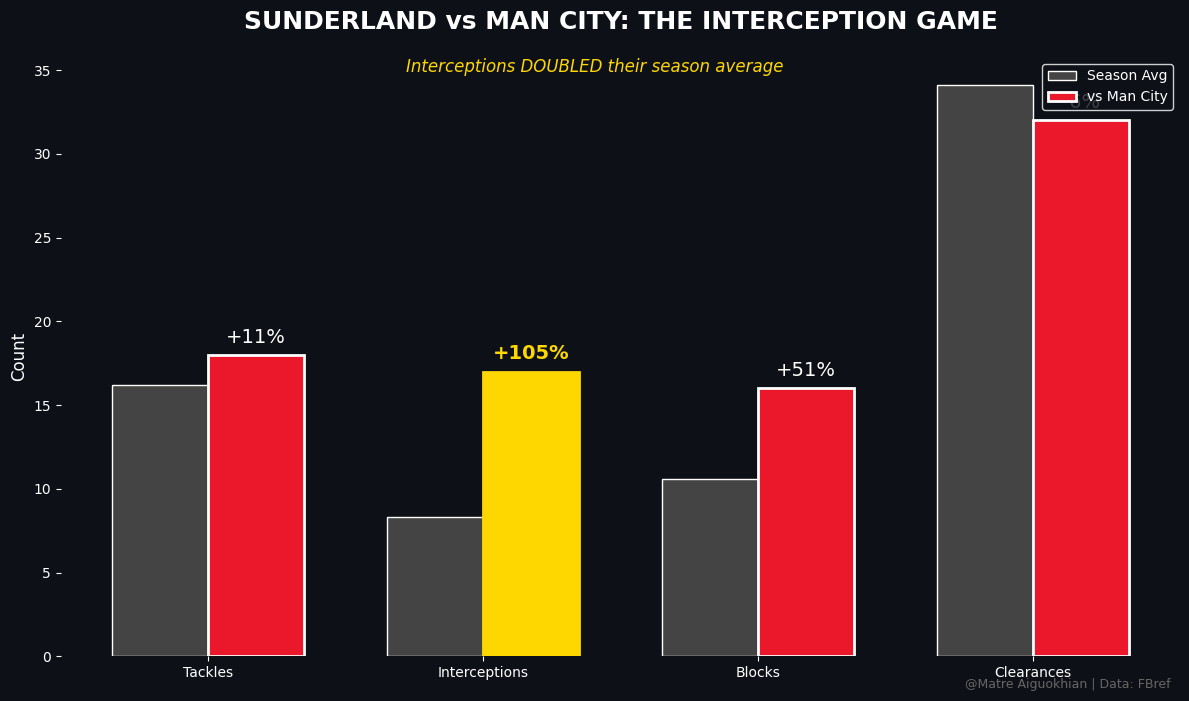

In [15]:
# DRAMATIC VERSION
fig, ax = plt.subplots(figsize=(12, 7))

# Dark theme
fig.patch.set_facecolor('#0D1117')
ax.set_facecolor('#0D1117')

stats = ['Tackles', 'Interceptions', 'Blocks', 'Clearances']
avg_vals = [16.2, 8.3, 10.6, 34.1]
city_vals = [18, 17, 16, 32]
pct_diff = ['+11%', '+105%', '+51%', '-6%']

x = range(len(stats))
width = 0.35

# Bars
bars1 = ax.bar([i - width/2 for i in x], avg_vals, width, 
               label='Season Avg', color='#444444', edgecolor='white', linewidth=1)
bars2 = ax.bar([i + width/2 for i in x], city_vals, width, 
               label='vs Man City', color='#EB172B', edgecolor='white', linewidth=2)

# Highlight the interceptions bar
bars2[1].set_color('#FFD700')  # Gold for the +105%

# Add percentage labels on City bars
for bar, pct in zip(bars2, pct_diff):
    height = bar.get_height()
    color = '#FFD700' if pct == '+105%' else 'white'
    fontweight = 'bold' if pct == '+105%' else 'normal'
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, pct,
            ha='center', va='bottom', color=color, fontsize=14, fontweight=fontweight)

# Labels and title
ax.set_ylabel('Count', color='white', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(stats, color='white', fontsize=10)
ax.tick_params(colors='white')

# Title - make it punchy
ax.set_title('SUNDERLAND vs MAN CITY: THE INTERCEPTION GAME', 
             color='white', fontsize=18, fontweight='bold', pad=20)

# Subtitle
fig.text(0.5, 0.89, 'Interceptions DOUBLED their season average', 
         ha='center', fontsize=12, color='#FFD700', style='italic')

# Legend
ax.legend(loc='upper right', facecolor='#0D1117', edgecolor='white', labelcolor='white')

# Remove spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Branding
fig.text(0.98, 0.01, '@Matre Aiguokhian | Data: FBref', ha='right', fontsize=9, color='#666666')

plt.tight_layout()
plt.savefig('../visuals/sunderland_city_defensive_v2.png', dpi=300, facecolor='#0D1117')
plt.show()

In [16]:
city_df = df[(df['Opponent'] == 'Manchester City') & (df['Comp']== 'Premier League')].copy()

city_df

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Tkl%,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err,Match Report
15,2025-12-06,15:00 (16:00),Premier League,Matchweek 15,Sat,Away,L,0,3,Manchester City,...,50,11,12,5,7,8,28,29,0,Match Report
19,2026-01-01,20:00 (21:00),Premier League,Matchweek 19,Thu,Home,D,0,0,Manchester City,...,38.5,16,16,5,11,17,35,32,0,Match Report


In [17]:
# for col in ['Tkl', 'Int', 'Blocks', 'Clr']:
#     city_df[col] = pd.to_numeric(city_df[col])

city = city_df[['Date','Venue','GF', 'GA', 'Tkl', 'Int', 'Blocks', 'Clr']]
print(city)

          Date Venue GF GA Tkl Int Blocks Clr
15  2025-12-06  Away  0  3  20   8     12  29
19  2026-01-01  Home  0  0  18  17     16  32


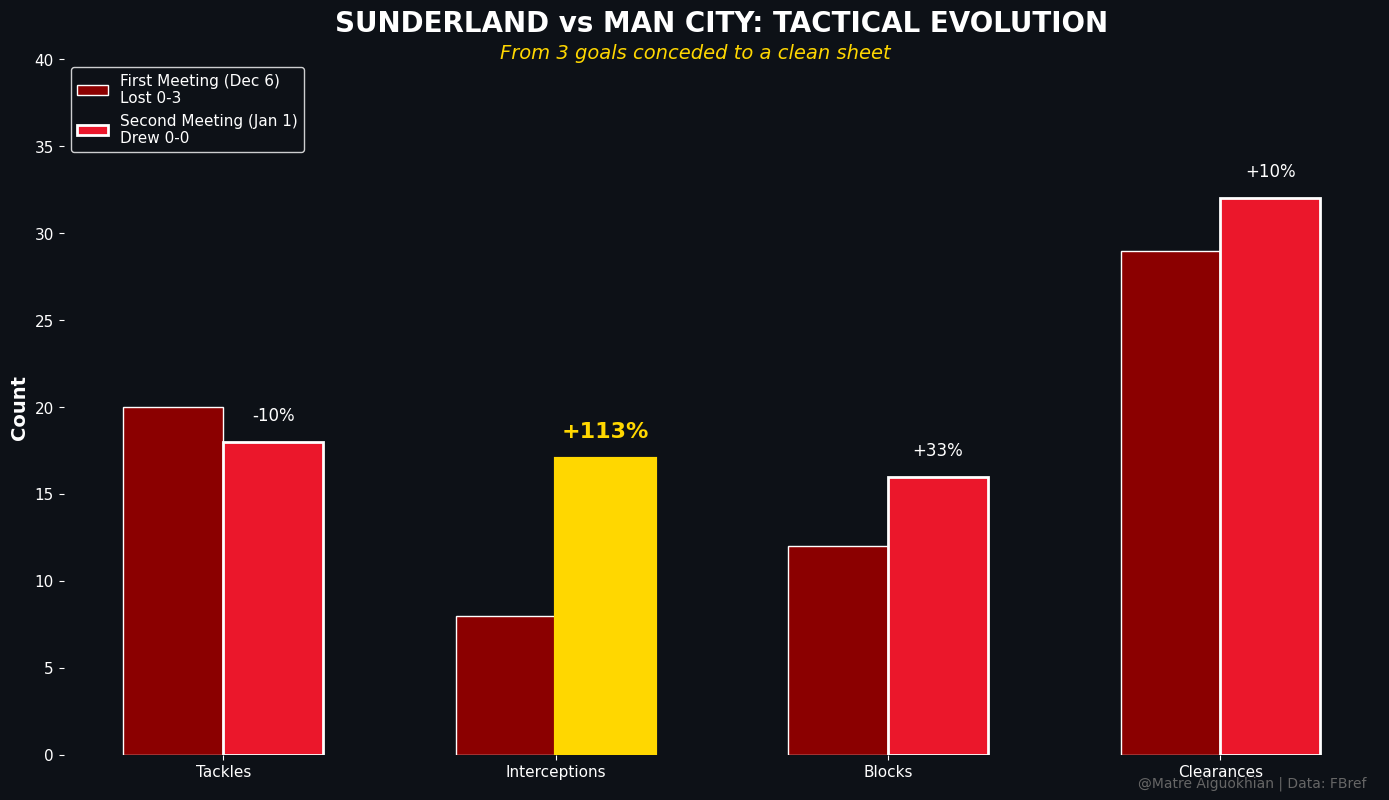

✅ Visual saved!


In [18]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(14, 8))
fig.patch.set_facecolor('#0D1117')
ax.set_facecolor('#0D1117')

# Data
stats = ['Tackles', 'Interceptions', 'Blocks', 'Clearances']
first_match = [20, 8, 12, 29]
second_match = [18, 17, 16, 32]
pct_change = ['-10%', '+113%', '+33%', '+10%']

width = 0.30
x = np.arange(len(stats))

# bars
bars1 = ax.bar(x - width/2, first_match, width, 
               label='First Meeting (Dec 6)\nLost 0-3', 
               color='#8B0000', edgecolor='white', linewidth=1)

bars2 = ax.bar(x + width/2, second_match, width,
               label='Second Meeting (Jan 1)\nDrew 0-0',
               color='#EB172B', edgecolor='white', linewidth=2)

# Highlight the interceptions
bars2[1].set_color('#FFD700') 
bars2[1].set_linewidth(3)

# Add percentage labels
for i, (bar, pct) in enumerate(zip(bars2, pct_change)):
    height = bar.get_height()
    color = '#FFD700' if i == 1 else 'white'
    weight = 'bold' if i == 1 else 'normal'
    size = 16 if i == 1 else 12
    
    ax.text(bar.get_x() + bar.get_width()/2, height + 1, pct,
            ha='center', va='bottom', color=color, 
            fontsize=size, fontweight=weight)

# Labels
ax.set_ylabel('Count', color='white', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(stats, color='white', fontsize=10)
ax.tick_params(colors='white', labelsize=11)


ax.set_ylim(0, 40)

# Title
ax.set_title('SUNDERLAND vs MAN CITY: TACTICAL EVOLUTION', 
             color='white', fontsize=20, fontweight='bold', pad=20)

# Subtitle
fig.text(0.5, 0.92, 'From 3 goals conceded to a clean sheet', 
         ha='center', fontsize=14, color='#FFD700', style='italic')

# MOVE LEGEND HIGHER AND TO THE LEFT
ax.legend(loc='upper left', facecolor='#0D1117', 
          edgecolor='white', labelcolor='white', fontsize=11)

# Remove spines
for spine in ax.spines.values():
    spine.set_visible(False)

fig.text(0.98, 0.01, '@Matre Aiguokhian | Data: FBref', 
         ha='right', fontsize=10, color='#666666')

plt.tight_layout()
plt.savefig('../visuals/sunderland_city_evolution.png', 
            dpi=300, facecolor='#0D1117', bbox_inches='tight')
plt.show()

print("✅ Visual saved!")

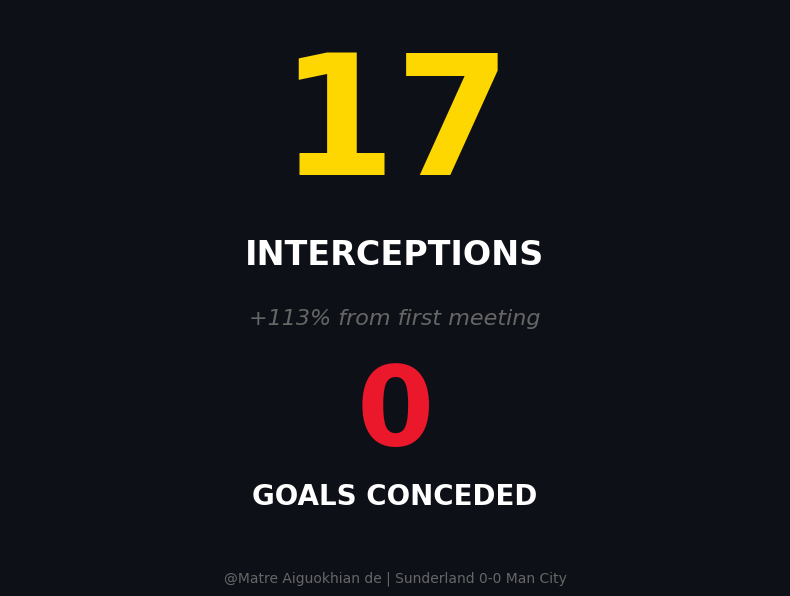

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('#0D1117')
ax.axis('off')

# Big numbers
fig.text(0.5, 0.7, '17', ha='center', fontsize=120, 
         color='#FFD700', fontweight='bold')
fig.text(0.5, 0.55, 'INTERCEPTIONS', ha='center', 
         fontsize=24, color='white', fontweight='bold')
fig.text(0.5, 0.45, '+113% from first meeting', ha='center',
         fontsize=16, color='#666666', style='italic')

fig.text(0.5, 0.25, '0', ha='center', fontsize=80,
         color='#EB172B', fontweight='bold')
fig.text(0.5, 0.15, 'GOALS CONCEDED', ha='center',
         fontsize=20, color='white', fontweight='bold')

fig.text(0.5, 0.02, '@Matre Aiguokhian de | Sunderland 0-0 Man City', 
         ha='center', fontsize=10, color='#666666')

plt.tight_layout()
plt.savefig('../visuals/key_stats_card.png', dpi=300, 
            facecolor='#0D1117', bbox_inches='tight')
plt.show()